<a href="https://colab.research.google.com/github/Drazo23/ChallengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,"1,084,800.00","56,000.00",11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.61,-74.08
1,Cama box,Muebles,"473,800.00","25,400.00",03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89,-72.51
2,Balón de baloncesto,Deportes y diversión,"23,700.00",0.00,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56
3,Modelado predictivo,Libros,"57,700.00","1,300.00",23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25,-75.56
4,Auriculares,Electrónicos,"138,900.00","5,600.00",25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.61,-74.08


#1. Análisis de facturación



## Ingresos totales de Tienda1, Tienda2, Tienda3 y Tienda4 ##


In [44]:
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

In [43]:
pd.options.display.float_format = '{:,.2f}'.format

ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

ingresos

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


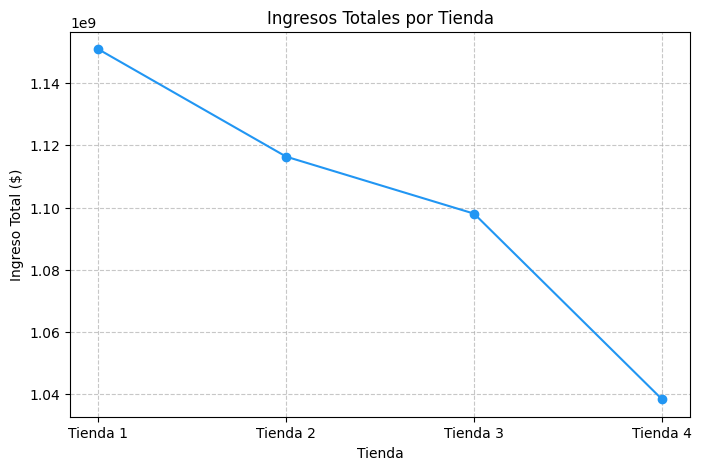

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ingresos["Tienda"], ingresos["Ingreso Total"], marker="o", linestyle="-", color="#2196F3")
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total ($)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# 2. Ventas por categoría

In [28]:
cat1 = tienda.groupby("Categoría del Producto").size().reset_index(name="Tienda 1")
cat2 = tienda2.groupby("Categoría del Producto").size().reset_index(name="Tienda 2")
cat3 = tienda3.groupby("Categoría del Producto").size().reset_index(name="Tienda 3")
cat4 = tienda4.groupby("Categoría del Producto").size().reset_index(name="Tienda 4")

categorias_comparadas = (
    cat1.merge(cat2, on="Categoría del Producto", how="outer")
        .merge(cat3, on="Categoría del Producto", how="outer")
        .merge(cat4, on="Categoría del Producto", how="outer")
)

categorias_comparadas = categorias_comparadas.fillna(0)
categorias_comparadas = categorias_comparadas.sort_values(by=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], ascending=False)

from tabulate import tabulate
print(tabulate(categorias_comparadas, headers='keys', tablefmt='grid', showindex=False))


+--------------------------+------------+------------+------------+------------+
| Categoría del Producto   |   Tienda 1 |   Tienda 2 |   Tienda 3 |   Tienda 4 |
+==========================+============+============+============+============+
| Muebles                  |        465 |        442 |        499 |        480 |
+--------------------------+------------+------------+------------+------------+
| Electrónicos             |        448 |        422 |        451 |        451 |
+--------------------------+------------+------------+------------+------------+
| Juguetes                 |        324 |        313 |        315 |        338 |
+--------------------------+------------+------------+------------+------------+
| Electrodomésticos        |        312 |        305 |        278 |        254 |
+--------------------------+------------+------------+------------+------------+
| Deportes y diversión     |        284 |        275 |        277 |        277 |
+--------------------------+

# 3. Calificación promedio de la tienda


In [29]:
total1 = tienda["Calificación"].sum()
promedio1 = tienda["Calificación"].mean()

total2 = tienda2["Calificación"].sum()
promedio2 = tienda2["Calificación"].mean()

total3 = tienda3["Calificación"].sum()
promedio3 = tienda3["Calificación"].mean()

total4 = tienda4["Calificación"].sum()
promedio4 = tienda4["Calificación"].mean()


satisfaccion = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Puntuación Total": [total1, total2, total3, total4],
    "Promedio de Satisfacción": [promedio1, promedio2, promedio3, promedio4]
})


satisfaccion = satisfaccion.sort_values(by="Promedio de Satisfacción", ascending=False).reset_index(drop=True)


satisfaccion

,Tienda,Puntuación Total,Promedio de Satisfacción
0,Tienda 3,9550,4.05
1,Tienda 2,9524,4.04
2,Tienda 4,9422,4.00
3,Tienda 1,9381,3.98


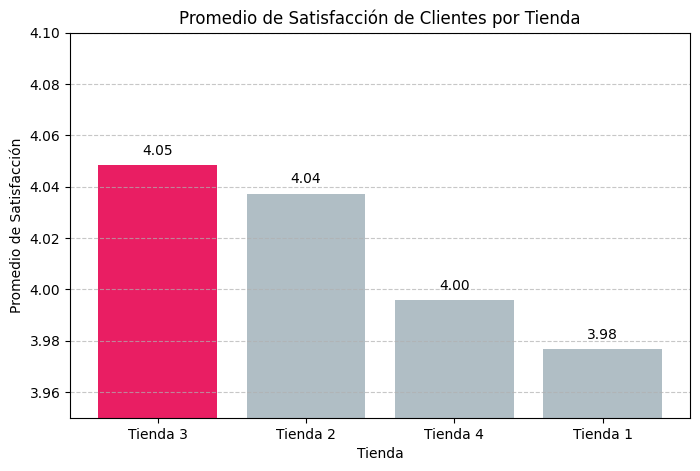

In [56]:
colors = ["#E91E63" if x == satisfaccion["Promedio de Satisfacción"].max() else "#B0BEC5" for x in satisfaccion["Promedio de Satisfacción"]]

plt.figure(figsize=(8,5))
plt.bar(satisfaccion["Tienda"], satisfaccion["Promedio de Satisfacción"], color=colors)
plt.title("Promedio de Satisfacción de Clientes por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Promedio de Satisfacción")
plt.ylim(3.95, 4.10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, v in enumerate(satisfaccion["Promedio de Satisfacción"]):
    plt.text(i, v + 0.003, f"{v:.2f}", ha='center', va='bottom')

plt.show()


# 4. Productos más y menos vendidos

In [42]:
import pandas as pd

def resumen_ventas(tienda_df, nombre_tienda):

    ventas = tienda_df.groupby("Producto").size().reset_index(name="Cantidad Vendida")

    ventas_ordenadas = ventas.sort_values(by="Cantidad Vendida", ascending=False)

    mas_vendidos = ventas_ordenadas.head(3).reset_index(drop=True)
    menos_vendidos = ventas_ordenadas.tail(3).reset_index(drop=True)

    resumen = pd.DataFrame({
        "Tienda": nombre_tienda,
        "Más vendido": mas_vendidos["Producto"],
        "Cantidad +": mas_vendidos["Cantidad Vendida"],
        "Menos vendido": menos_vendidos["Producto"],
        "Cantidad -": menos_vendidos["Cantidad Vendida"]
    })

    return resumen

resumen1 = resumen_ventas(tienda, "Tienda 1")
resumen2 = resumen_ventas(tienda2, "Tienda 2")
resumen3 = resumen_ventas(tienda3, "Tienda 3")
resumen4 = resumen_ventas(tienda4, "Tienda 4")

tabla_final = pd.concat([resumen1, resumen2, resumen3, resumen4], ignore_index=True)

tabla_final


,Tienda,Más vendido,Cantidad +,Menos vendido,Cantidad -
0,Tienda 1,Armario,60,Olla de presión,35
1,Tienda 1,TV LED UHD 4K,60,Celular ABXY,33
2,Tienda 1,Microondas,60,Auriculares con micrófono,33
3,Tienda 2,Iniciando en programación,65,Impresora,34
4,Tienda 2,Microondas,62,Mesa de comedor,34
5,Tienda 2,Batería,61,Juego de mesa,32
6,Tienda 3,Kit de bancas,57,Microondas,36
7,Tienda 3,Mesa de comedor,56,Set de vasos,36
8,Tienda 3,Cama king,56,Bloques de construcción,35
9,Tienda 4,Cama box,62,Guitarra acústica,37


# 5. Envío promedio por tienda

In [41]:
promedio_envio1 = tienda["Costo de envío"].mean()
promedio_envio2 = tienda2["Costo de envío"].mean()
promedio_envio3 = tienda3["Costo de envío"].mean()
promedio_envio4 = tienda4["Costo de envío"].mean()

tabla_envios = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo promedio de envío": [
        promedio_envio1,
        promedio_envio2,
        promedio_envio3,
        promedio_envio4
    ]
})

tabla_envios = tabla_envios.sort_values(by="Costo promedio de envío")

tabla_envios

,Tienda,Costo promedio de envío
3,Tienda 4,"23,459.46"
2,Tienda 3,"24,805.68"
1,Tienda 2,"25,216.24"
0,Tienda 1,"26,018.61"


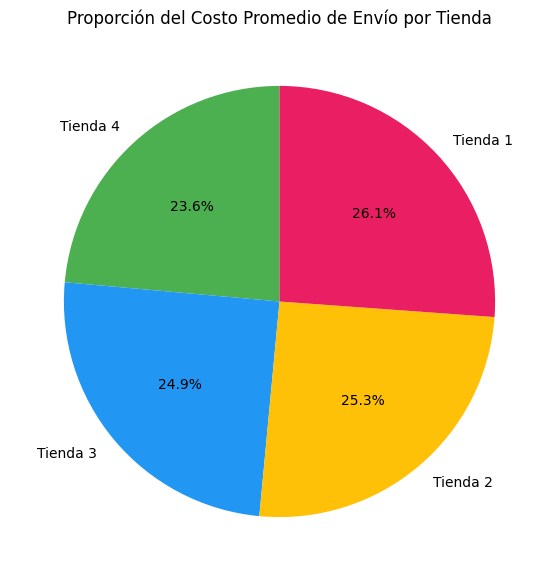

In [57]:
plt.figure(figsize=(7,7))
plt.pie(
    tabla_envios["Costo promedio de envío"],
    labels=tabla_envios["Tienda"],
    autopct="%1.1f%%",
    colors=["#4CAF50", "#2196F3", "#FFC107", "#E91E63"],
    startangle=90
)
plt.title("Proporción del Costo Promedio de Envío por Tienda")
plt.show()

## **INFORME FINAL**

###**Introducción**

El propósito de este análisis es ayudar al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento.(Tienda 1, Tienda 2, Tienda 3 y Tienda 4). Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos. Para ello, se evaluaron los ingresos totales, las categorías más y menos vendidas, la calificación promedio de los clientes, los productos con mejor y peor desempeño, y el costo promedio de envío por tienda.
Los resultados obtenidos se presentan a continuación, junto con un análisis interpretativo de los hallazgos.

1. Ingresos totales por tienda

Los ingresos totales muestran el volumen de ventas alcanzado por cada tienda. Los resultados fueron los siguientes:


Tienda 1 - 	1,150,880,400

Tienda 2 - 	1,116,343,500

Tienda 3 - 	1,098,019,600

Tienda 4 - 	1,038,375,700

Interpretación:
La Tienda 1 presenta el ingreso más alto, seguida por la Tienda 2. Esto sugiere que ambas poseen una base de clientes más sólida o mayor volumen de ventas, aunque no necesariamente mejor satisfacción.

2. Categorías de productos más y menos vendidas

En términos generales, las categorías con mayor volumen de ventas fueron Muebles y Electrónicos en todas las tiendas.
Por otro lado, las categorías menos vendidas fueron Libros, Artículos para el hogar e Instrumentos musicales, con una demanda más baja.

3. Calificación promedio de los clientes

Tienda 3 - 	 4.05

Tienda 2 - 	 4.04

Tienda 4 - 	 4.00

Tienda 1 - 	 3.98

Interpretación:
Aunque la diferencia es leve, la Tienda 3 obtuvo la mejor calificación promedio, lo que indica una mayor satisfacción general de los clientes. Esto sugiere que su atención, experiencia de compra o calidad del servicio pueden ser más favorables.

4. Productos más y menos vendidos

Tienda 1: Armario, TV LED UHD 4K y Microondas fueron los más vendidos.
Menos vendidos: Olla de presión, Celular ABXY y Auriculares con micrófono.

Tienda 2: Iniciando en programación, Microondas y Batería fueron los más vendidos.
Menos vendidos: Impresora, Mesa de comedor y Juego de mesa.

Tienda 3: Kit de bancas, Mesa de comedor y Cama king fueron los más vendidos.
Menos vendidos: Microondas, Set de vasos y Bloques de construcción.

Tienda 4: Cama box, Cubertería y Cama king fueron los más vendidos.
Menos vendidos: Guitarra acústica, Armario y Guitarra eléctrica.

Interpretación:
Se observa que productos del hogar (muebles, camas y electrodomésticos) son los de mejor desempeño. La Tienda 3 y la Tienda 4 destacan por su diversidad en ventas en estos mobiliario.

5. Costo promedio de envío por tienda

Tienda 4 - 	23,459

Tienda 3 - 	24,805

Tienda 2 - 	25,216

Tienda 1 - 	26,018

Interpretación:
Aunque el costo de envío suele ser asumido por el cliente, puede influir indirectamente en la decisión de compra. En este caso, la Tienda 4 ofrece el envío más económico, lo que podría favorecer la competitividad de sus precios finales.

Recomendación

Vender: Tienda 1.

Razones:

Aunque genera más ingresos hoy, presenta la peor calificación de clientes (3.98). Eso indica riesgo de pérdida de ventas futuras y más gasto en retención si se quisiera mejorarla.

Mayor costo de envío (26,018) reduce competitividad y puede estar mermando margen o forzando descuentos.

No lidera en las categorías más demandadas (muebles/electrónica) — su ventaja actual parece volumen, no fortaleza estructural.

Vender la Tienda 1 libera capital importante sin sacrificar las tiendas que tienen mejor reputación y/o ventajas competitivas (Tienda 3: mejor satisfacción; Tienda 4: envíos baratos y fortaleza en muebles).

Vender la tienda que hoy factura más suena contraintuïtivo, pero la decisión de negocio para iniciar un nuevo emprendimiento suele priorizar activos con menor potencial futuro o altos costes/riesgos operativos. Tienda 1 muestra señales claras de ser menos eficiente operacional y más riesgosa a mediano plazo.